In [1]:
import sklearn
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
root = Path.cwd().parent.parent
dataset_path = root.joinpath('res', 'all_raw.csv')

df = pd.read_csv(dataset_path)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df.Date.dt.strftime("%d.%m.%Y")
df['Date'] = df['Date'].apply(lambda x : x[:-15])
print(df['Date'])

0       2017-01-01
1       2017-01-02
2       2017-01-03
3       2017-01-04
4       2017-01-05
           ...    
1272    2020-06-26
1273    2020-06-27
1274    2020-06-28
1275    2020-06-29
1276    2020-06-30
Name: Date, Length: 1277, dtype: object


In [3]:
end_date = '2020-01-01'
# end_date = str(pd.to_datetime('01.01.2020'))
end_index = df.index[(df['Date'] == end_date).values][0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1277 non-null   object 
 1   deaths                       162 non-null    float64
 2   confirmed                    162 non-null    float64
 3   recovered                    162 non-null    float64
 4   active                       162 non-null    float64
 5   new_confirmed                162 non-null    float64
 6   new_recovered                162 non-null    float64
 7   new_deaths                   162 non-null    float64
 8   CVX                          879 non-null    float64
 9   XOM                          879 non-null    float64
 10  PTR                          879 non-null    float64
 11  GM                           879 non-null    float64
 12  AAPL                         879 non-null    float64
 13  AMZN              

[]

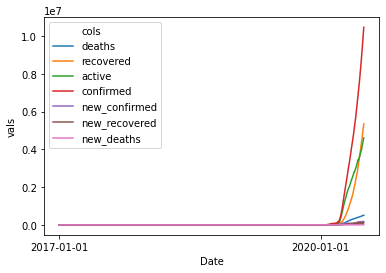

In [4]:
# Corona processing. Extend data to earliest date. Plot to verify. Don't scale.

df['deaths'].fillna(0, inplace=True)
df['recovered'].fillna(0, inplace=True)
df['active'].fillna(0, inplace=True)
df['confirmed'].fillna(0, inplace=True)
df['new_confirmed'].fillna(0, inplace=True)
df['new_recovered'].fillna(0, inplace=True)
df['new_deaths'].fillna(0, inplace=True)

covid_df = df.melt('Date', value_vars= ['deaths', 'recovered', 'active', 'confirmed', 'new_confirmed', 'new_recovered', 
                                        'new_deaths'], 
                   var_name='cols',  value_name='vals')
g = sns.lineplot(x="Date", y="vals", hue='cols', data=covid_df)
g.set_xticks([0,end_index])
g.plot()

[]

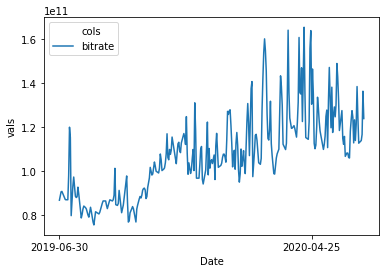

In [5]:
# IX Data inspection. Maybe use moving average?
ix_df = df.melt('Date', value_vars= ['bitrate'], 
                   var_name='cols',  value_name='vals')
g = sns.lineplot(x="Date", y="vals", hue='cols', data=ix_df)
g.set_xticks([0,300])
g.plot()

[]

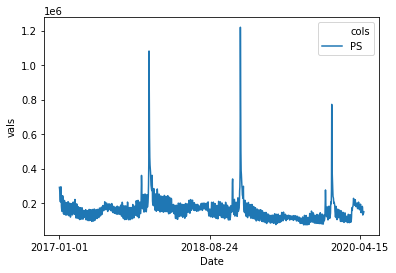

In [6]:
# Playstation data processing. Reduce to a single data series by summation over the PSN.
if 'PS3' in df.keys():
    df['PS'] = df['PS3'] + df['PS4'] + df['Vita']
    df.drop('PS3', axis=1, inplace=True)
    df.drop('PS4', axis=1, inplace=True)
    df.drop('Vita', axis=1, inplace=True)

ps_df = df.melt('Date', value_vars= ['PS'], 
                   var_name='cols',  value_name='vals')

g = sns.lineplot(x="Date", y="vals", hue='cols', data=ps_df)
g.set_xticks([0,600,1200])
g.plot()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1277 non-null   object 
 1   deaths                       1277 non-null   float64
 2   confirmed                    1277 non-null   float64
 3   recovered                    1277 non-null   float64
 4   active                       1277 non-null   float64
 5   new_confirmed                1277 non-null   float64
 6   new_recovered                1277 non-null   float64
 7   new_deaths                   1277 non-null   float64
 8   CVX                          879 non-null    float64
 9   XOM                          879 non-null    float64
 10  PTR                          879 non-null    float64
 11  GM                           879 non-null    float64
 12  AAPL                         879 non-null    float64
 13  AMZN              

[]

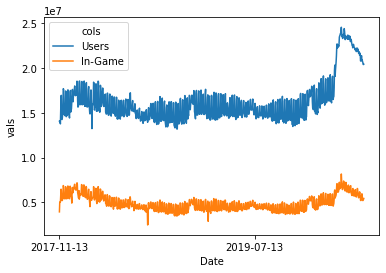

In [8]:
# Steam processing. Maybe use rolling average?
steam_df = df.melt('Date', value_vars= ['Users', 'In-Game'], 
                   var_name='cols',  value_name='vals')

g = sns.lineplot(x="Date", y="vals", hue='cols', data=steam_df)
g.set_xticks([0,600,1200])
g.plot()

Total NaN Values left: 29


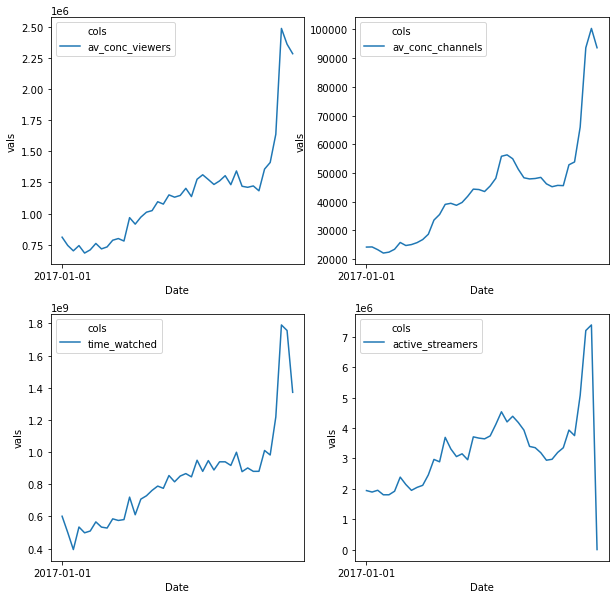

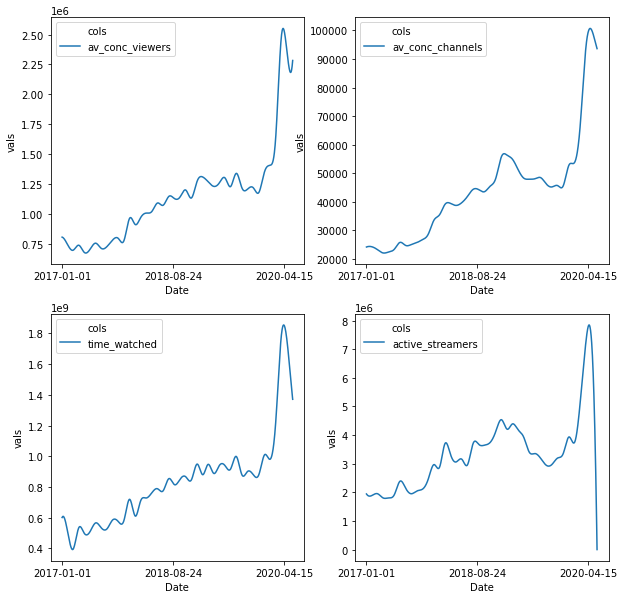

In [9]:
# Twitch processing. Visualize default data first. Seperate plots because of the different scales before scaling.

fig0, axes0 = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(10,10))

twitch_0 = df.melt('Date', value_vars= ['av_conc_viewers'], 
                   var_name='cols',  value_name='vals')
twitch_1 = df.melt('Date', value_vars= ['av_conc_channels'], 
                   var_name='cols',  value_name='vals')
twitch_2 = df.melt('Date', value_vars= ['time_watched'], 
                   var_name='cols',  value_name='vals')
twitch_3 = df.melt('Date', value_vars= ['active_streamers'], 
                   var_name='cols',  value_name='vals')

g0 = sns.lineplot(x="Date", y="vals", hue='cols', data=twitch_0, ax=axes0[0, 0])
g1 = sns.lineplot(x="Date", y="vals", hue='cols', data=twitch_1, ax=axes0[0, 1])
g2 = sns.lineplot(x="Date", y="vals", hue='cols', data=twitch_2, ax=axes0[1, 0])
g3 = sns.lineplot(x="Date", y="vals", hue='cols', data=twitch_3, ax=axes0[1, 1])
g0.set_xticks([0,600,1200])
g1.set_xticks([0,600,1200])
g2.set_xticks([0,600,1200])
g3.set_xticks([0,600,1200])
g0.plot()
g1.plot()
g2.plot()
g3.plot()


# Linear interpolation because net operates on daily data.
df['av_conc_viewers'].interpolate(method='polynomial', order=3, inplace=True)
df['av_conc_channels'].interpolate(method='polynomial', order=3, inplace=True)
df['time_watched'].interpolate(method='polynomial', order=3, inplace=True)
df['active_streamers'].interpolate(method='polynomial', order=3, inplace=True)

# Visualize.
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(10,10))

twitch_0 = df.melt('Date', value_vars= ['av_conc_viewers'], 
                   var_name='cols',  value_name='vals')
twitch_1 = df.melt('Date', value_vars= ['av_conc_channels'], 
                   var_name='cols',  value_name='vals')
twitch_2 = df.melt('Date', value_vars= ['time_watched'], 
                   var_name='cols',  value_name='vals')
twitch_3 = df.melt('Date', value_vars= ['active_streamers'], 
                   var_name='cols',  value_name='vals')

g0 = sns.lineplot(x="Date", y="vals", hue='cols', data=twitch_0, ax=axes[0, 0])
g1 = sns.lineplot(x="Date", y="vals", hue='cols', data=twitch_1, ax=axes[0, 1])
g2 = sns.lineplot(x="Date", y="vals", hue='cols', data=twitch_2, ax=axes[1, 0])
g3 = sns.lineplot(x="Date", y="vals", hue='cols', data=twitch_3, ax=axes[1, 1])
g0.set_xticks([0,600,1200])
g1.set_xticks([0,600,1200])
g2.set_xticks([0,600,1200])
g3.set_xticks([0,600,1200])
g0.plot()
g1.plot()
g2.plot()
g3.plot()

print('Total NaN Values left: {}'.format(df['time_watched'].isna().sum()))

[]

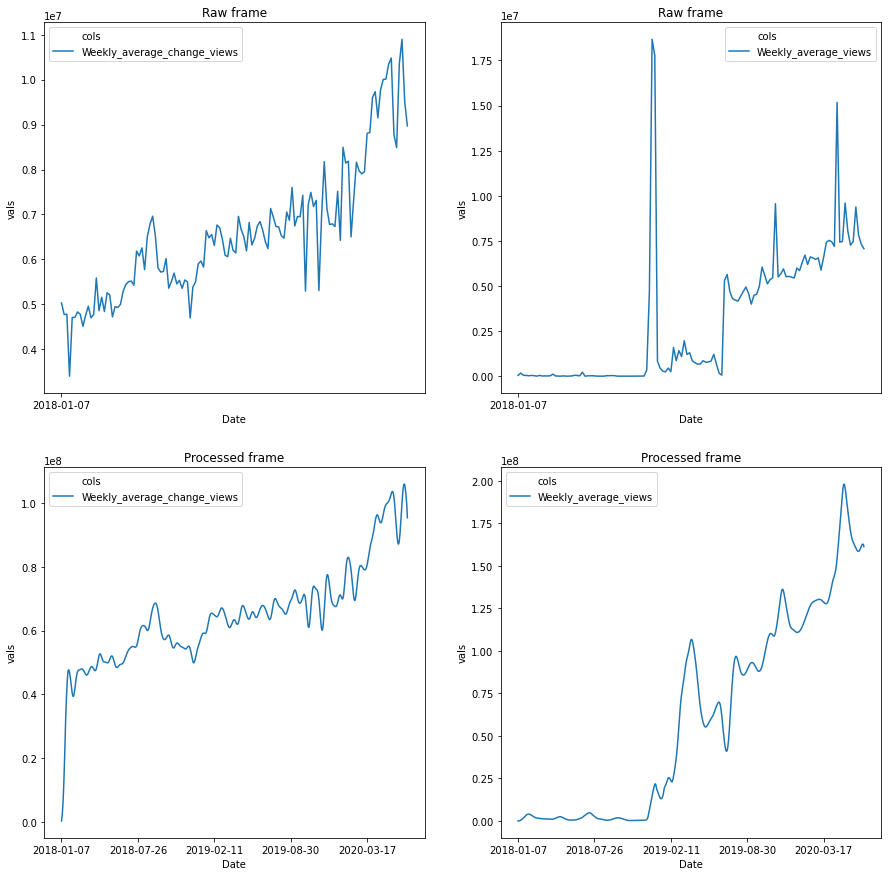

In [10]:
# Socialblade processing.
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(15,15))

sb_00 = df.melt('Date', value_vars= ['Weekly_average_change_views'], 
                   var_name='cols',  value_name='vals')
sb_01 = sb_00.copy(deep=True)
sb_01['vals'] = sb_01['vals'].interpolate(method='polynomial', order=3)
sb_01['vals'] = sb_01['vals'].rolling(20, win_type='triang', min_periods=1).sum()

sb_10 = df.melt('Date', value_vars= ['Weekly_average_views'], 
                   var_name='cols',  value_name='vals')
sb_11 = sb_10.copy(deep=True)
sb_11['vals'] = sb_10['vals'].interpolate(method='polynomial', order=3)
mask = np.arange(0,len(sb_11.vals))
mask = mask < 905
sb_11.loc[mask, 'vals'] = np.where(sb_11.loc[mask, 'vals'] > 3000000,0, sb_11.loc[mask, 'vals'])
sb_11.loc[:, 'vals'] = np.where(sb_11.loc[:, 'vals'] < 0,0, sb_11.loc[:, 'vals'])

sb_11.loc[mask, 'vals'] = sb_11.loc[mask, 'vals'].to_numpy() * np.linspace(1,4,905)

sb_11['vals'] = sb_11['vals'].rolling(40, win_type='triang', min_periods=1).sum()

# Write to the original dataset.
df['Weekly_average_change_views'] = sb_01['vals']
df['Weekly_average_views'] = sb_11['vals']

# Plot for inspection.
g0 = sns.lineplot(x="Date", y="vals", hue='cols', data=sb_00, ax=axes[0,0])
g1 = sns.lineplot(x="Date", y="vals", hue='cols', data=sb_10, ax=axes[0,1])
g2 = sns.lineplot(x="Date", y="vals", hue='cols', data=sb_01, ax=axes[1,0])
g3 = sns.lineplot(x="Date", y="vals", hue='cols', data=sb_11, ax=axes[1,1])

g0.set_xticks(np.arange(0,801,200))
g0.set_title('Raw frame')
g1.set_xticks(np.arange(0,801,200))
g1.set_title('Raw frame')
g2.set_xticks(np.arange(0,801,200))
g2.set_title('Processed frame')
g3.set_xticks(np.arange(0,801,200))
g3.set_title('Processed frame')

g0.plot()
g1.plot()
g2.plot()
g3.plot()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1277 non-null   object 
 1   deaths                       1277 non-null   float64
 2   confirmed                    1277 non-null   float64
 3   recovered                    1277 non-null   float64
 4   active                       1277 non-null   float64
 5   new_confirmed                1277 non-null   float64
 6   new_recovered                1277 non-null   float64
 7   new_deaths                   1277 non-null   float64
 8   CVX                          879 non-null    float64
 9   XOM                          879 non-null    float64
 10  PTR                          879 non-null    float64
 11  GM                           879 non-null    float64
 12  AAPL                         879 non-null    float64
 13  AMZN              

In [53]:
# Scaler for the whole dataset. Only operates on the dates before Covid to avoid test set bias.

# TODO: SEPERATE PRE COVID DATA FOR SCALING, ALSO MAYBE THE TEST SET.

X_scaler = StandardScaler()
column_mask = np.linspace(0,len(df.keys())-1,len(df.keys())-1)
# Exclude from scaling
exclude = [0, 1, 2, 3, 4, 5, 6, 7, 18, 19]
column_mask = np.delete(column_mask, exclude).astype('int64')
ct = ColumnTransformer([('scaler', X_scaler, column_mask)],remainder='passthrough')
X_train_scaled = ct.fit_transform(df)

<ipython-input-15-104ec33adff8>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df,ax=ax)


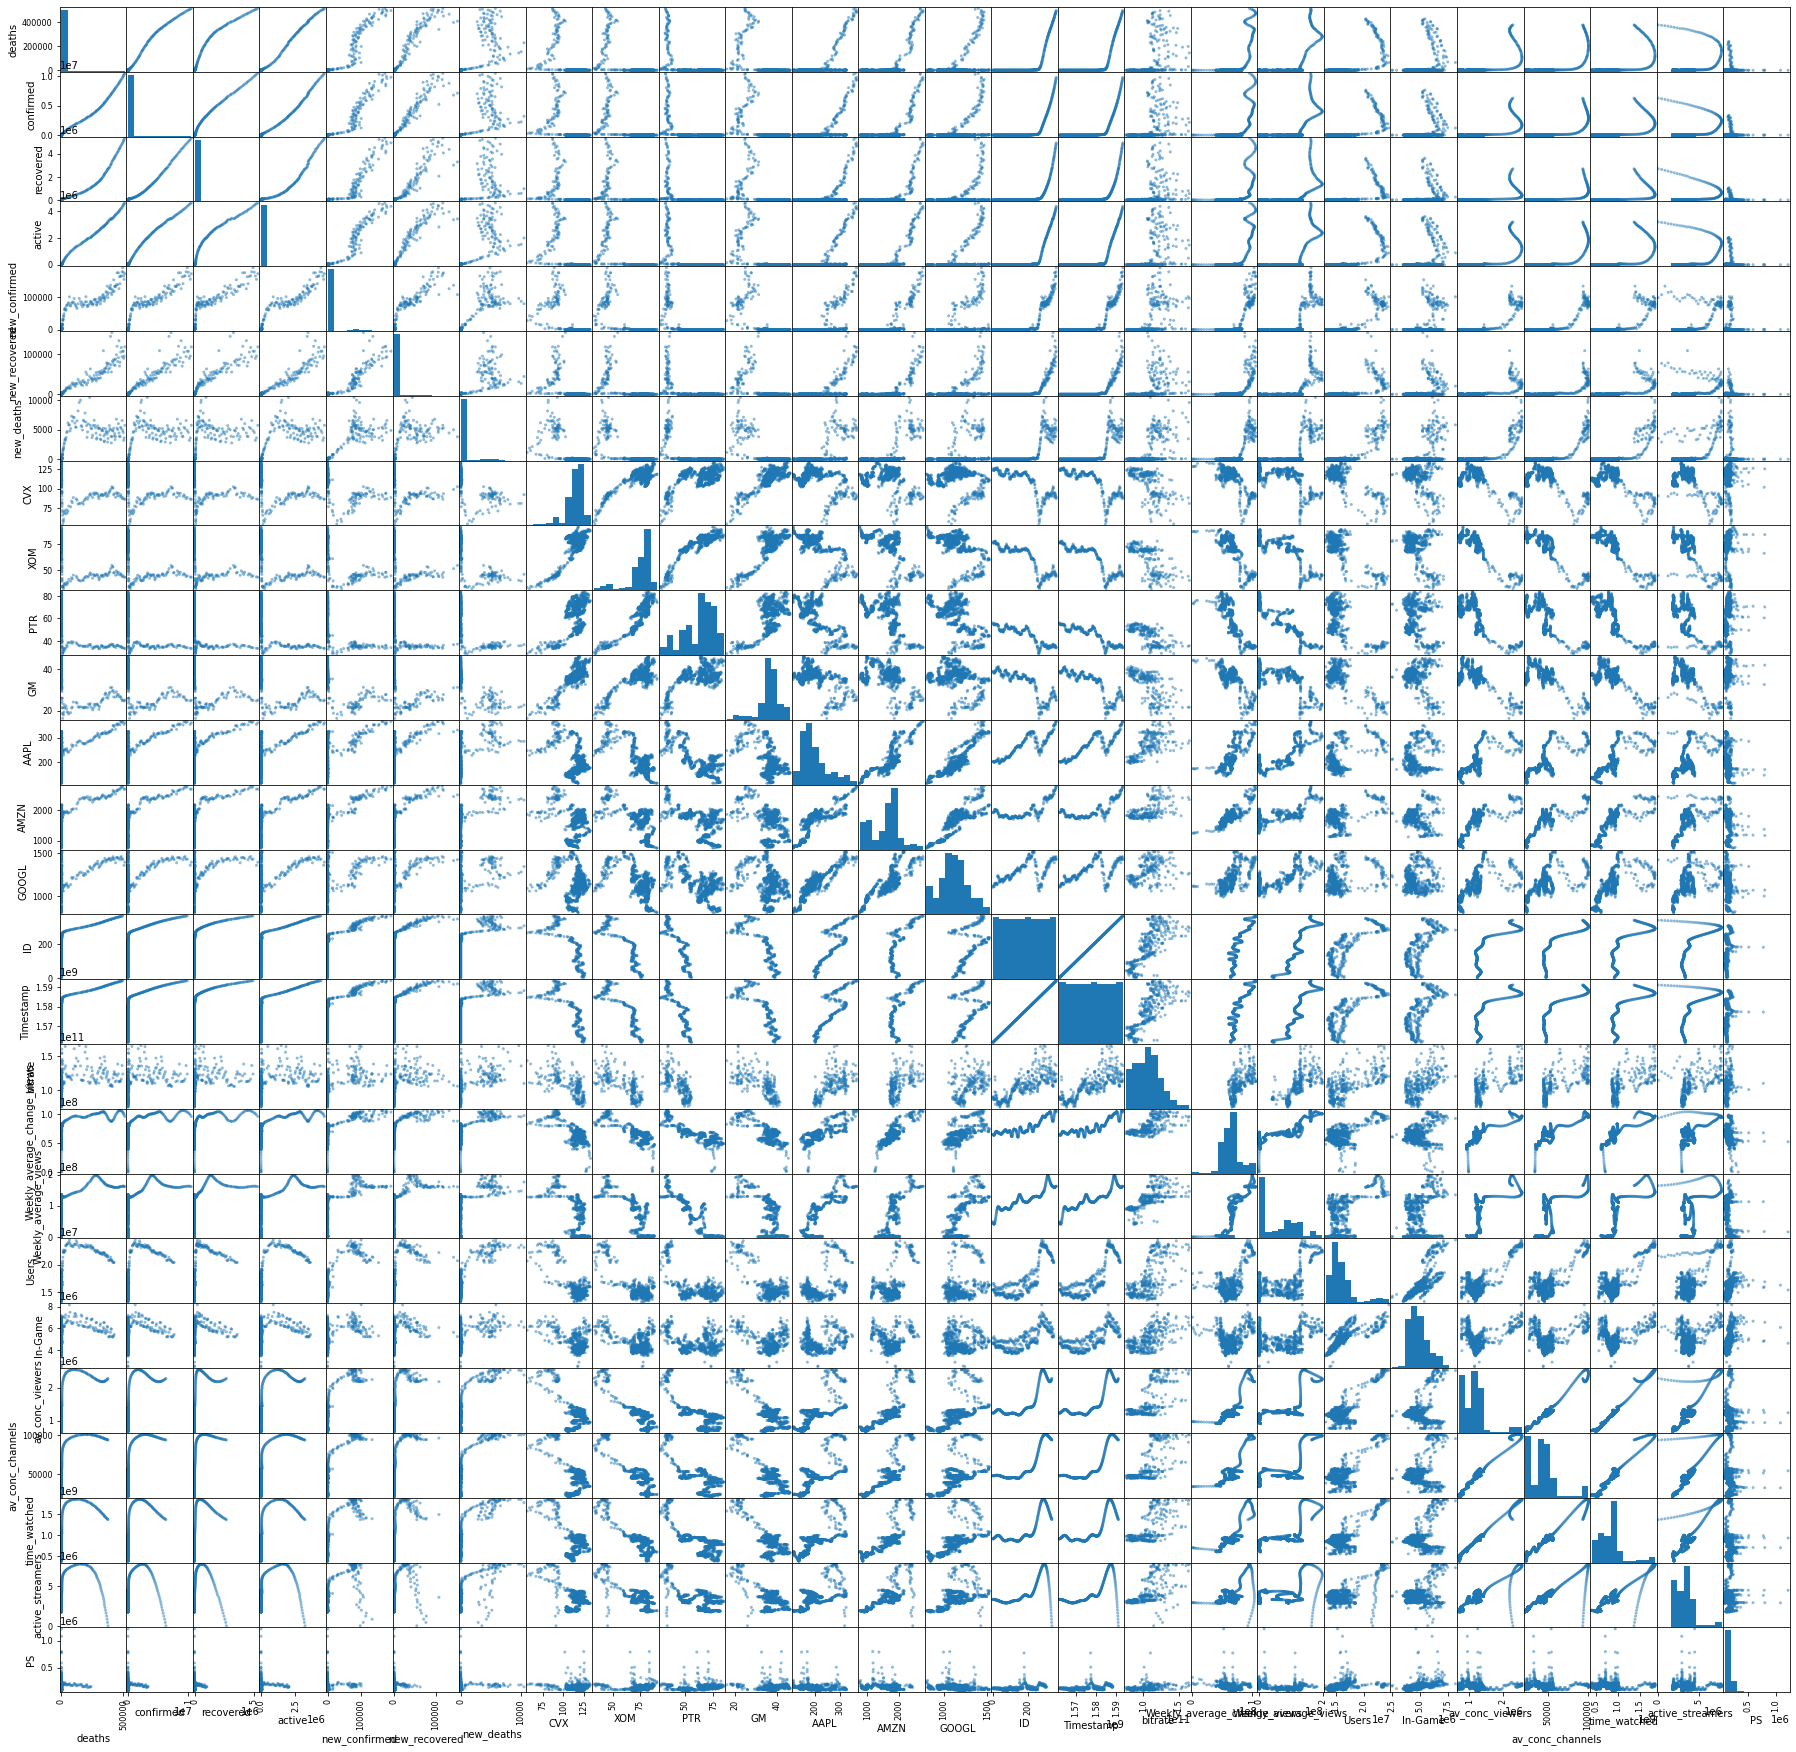

In [15]:
fig = plt.figure(figsize=(31,31))
ax = fig.add_axes([0,0,1,1])

pd.plotting.scatter_matrix(df,ax=ax)
plt.show()